In [489]:
import pandas as pd

train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')
train.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


In [533]:
train['country'].value_counts()

country
USA               2382
UK                 255
France              86
Germany             61
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: count, dtype: int64

In [491]:
# Remove language column
train['language'].value_counts()

language
English       2872
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Italian          5
Cantonese        5
Korean           4
Portuguese       4
Hindi            3
Norwegian        3
Dutch            3
Danish           3
Aboriginal       2
Thai             2
Indonesian       2
Dari             2
Persian          2
Kazakh           1
Maya             1
Aramaic          1
Filipino         1
Bosnian          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: count, dtype: int64

In [492]:
import numpy as np

names_train = ['features_countvec/train_countvec_features_actor_1_name.npy', 'features_countvec/train_countvec_features_actor_2_name.npy', 
               'features_countvec/train_countvec_features_director_name.npy', 'features_doc2vec/train_doc2vec_features_genre.npy',
               'features_doc2vec/train_doc2vec_features_plot_keywords.npy', 'features_fasttext/train_fasttext_title_embeddings.npy']
names_test = ['features_countvec/test_countvec_features_actor_1_name.npy', 'features_countvec/test_countvec_features_actor_2_name.npy', 
               'features_countvec/test_countvec_features_director_name.npy', 'features_doc2vec/test_doc2vec_features_genre.npy',
               'features_doc2vec/test_doc2vec_features_plot_keywords.npy', 'features_fasttext/test_fasttext_title_embeddings.npy']

for name in names_train:
    print(name)
    print(len(np.load(name)[0]))

# The count vectors have too many columns and need to be trimmed

features_countvec/train_countvec_features_actor_1_name.npy
2063
features_countvec/train_countvec_features_actor_2_name.npy
2919
features_countvec/train_countvec_features_director_name.npy
2113
features_doc2vec/train_doc2vec_features_genre.npy
100
features_doc2vec/train_doc2vec_features_plot_keywords.npy
100
features_fasttext/train_fasttext_title_embeddings.npy
100


In [493]:
def create_columns(len, unique):
    columns = []
    for i in range(len):
        columns.append(str(i + unique))
    return columns

def drop_col(df):
    temp = []
    for col in df.columns:
        if (df[col].sum() < 4):
            temp.append(col)
    return df.drop(columns=temp, axis=1)

In [494]:
# Drop the number of columns due to too many dimensions, we will lose information but
# we can assume that actors and directors with lower frequency would be less popular and thus
# less well know, therefore they would have minimum effect on the success of the movie
# as viewers would not know if they are good or bad.
temp1 = np.load('features_countvec/train_countvec_features_actor_1_name.npy')
df_act_1 = pd.DataFrame(temp1, columns=create_columns(len(temp1[0]), 0))

temp2 = np.load('features_countvec/train_countvec_features_actor_2_name.npy')
df_act_2 = pd.DataFrame(temp2, columns=create_columns(len(temp2[0]), len(temp1[0])))

temp3 = np.load('features_countvec/train_countvec_features_director_name.npy')
df_dir = pd.DataFrame(temp3, columns=create_columns(len(temp3[0]), len(temp1[0]) + len(temp2[0])))

temp4 = np.load('features_doc2vec/train_doc2vec_features_genre.npy')
df_genre = pd.DataFrame(temp4, columns=create_columns(len(temp4[0]), len(temp1[0]) + len(temp2[0]) + 100))

temp5 = np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy')
df_keyword = pd.DataFrame(temp5, columns=create_columns(len(temp5[0]), len(temp1[0]) + len(temp2[0]) + 200))

temp6 = np.load('features_fasttext/train_fasttext_title_embeddings.npy')
df_title = pd.DataFrame(temp6, columns=create_columns(len(temp6[0]), len(temp1[0]) + len(temp2[0]) + 300))

#df_act_1 = drop_col(df_act_1)
#df_act_2 = drop_col(df_act_2)
#df_dir = drop_col(df_dir)

In [495]:
print(len(df_act_1.columns))
print(len(df_act_2.columns))
print(len(df_dir.columns))

# Still too many columns

2063
2919
2113


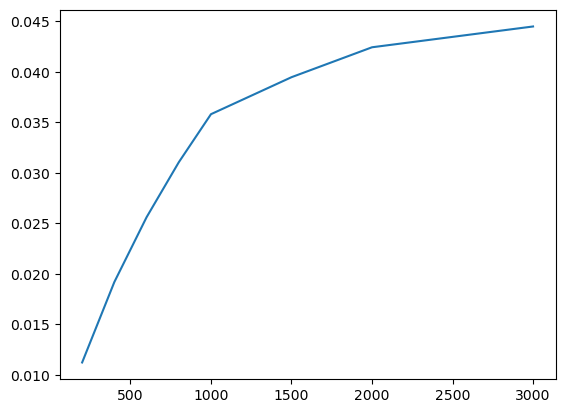

In [535]:
from sklearn.decomposition import PCA
PCs = [200, 400, 600, 800, 1000, 1500, 2000, 3000]
var = []
for n in PCs:

    pca = PCA(n_components=n)

    df_list = [df_act_1, df_act_2, df_dir, df_genre, df_keyword, df_title]
    train_pre_data = pd.concat(df_list, axis=1)

    columns = []
    for i in range(n):
        columns.append(str(i))

    principalComponents = pca.fit_transform(train_pre_data)

    var.append(np.var(principalComponents))
import matplotlib.pyplot as plt
cum_var = np.cumsum(var)

plt.plot(PCs, cum_var)
plt.show()

In [498]:
#print(var)
# We will pick 800 principal components as that doesn't add too many columns to cause the curse of dimensionality

In [499]:
# Implement PCA to cut down columns further
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)

df_list = [df_act_1, df_act_2, df_dir, df_genre, df_keyword, df_title]
train_pre_data = pd.concat(df_list, axis=1)

columns = []
for i in range(1000):
    columns.append(str(i))

principalComponents = pca.fit_transform(train_pre_data)

df_pca = pd.DataFrame(data=principalComponents, columns=columns)

df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.040884,-0.020942,-0.000257,-0.019745,-0.067885,-0.039245,0.021992,0.009400,-0.022269,-0.052101,...,0.059977,-0.048973,0.022657,-0.076502,0.002130,-0.005368,-0.031508,0.006487,0.055442,0.001262
1,-0.033920,0.020144,-0.035500,0.005677,-0.060058,-0.015016,-0.044036,-0.028719,0.066599,-0.019116,...,0.046535,-0.183194,-0.001064,-0.165053,-0.007401,-0.093654,-0.030661,0.040324,0.065896,-0.016562
2,-0.107385,0.041061,1.065320,0.087509,0.233551,-0.097137,-0.085973,-0.001674,0.078661,-0.038405,...,-0.005429,0.043036,-0.008428,0.013363,-0.030541,-0.049686,0.008019,0.021622,-0.002560,-0.033822
3,0.954613,-0.382942,0.102431,-0.118135,-0.026906,-0.015410,-0.038182,-0.018906,0.041304,0.030080,...,0.052513,0.010700,-0.048914,-0.078108,0.073777,-0.074228,0.052274,-0.061390,-0.047673,0.047053
4,-0.039276,-0.068091,-0.053940,-0.056007,-0.171131,-0.110063,-0.183965,-0.695004,-0.328163,0.731332,...,0.013161,0.048283,0.063338,0.028703,-0.015941,-0.033795,0.043301,0.088330,-0.137305,-0.062244


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [501]:
#test_pre_data = pd.DataFrame()

#df_list = [df_act_1, df_act_2, df_dir, df_genre, df_keyword, df_title]
#train_pre_data = pd.concat(df_list, axis=1)

# Drop old columns and unnecessary columns
titles = ['actor_1_name', 'actor_2_name', 'director_name', 'genres', 'plot_keywords', 'language', 'country',
            'title_embedding', 'movie_title', 'actor_3_name', 'actor_3_facebook_likes']
train_new = pd.concat([train.drop(columns=titles), df_pca], axis=1)

print(len(train_new.columns))
train_new.head()


616


,id,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381
0,1,186,73,28,2000,422783777,644348,6458,0,656,...,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,2,252,97,0,654,20433940,78883,1876,8,662,...,0.005036,0.003941,0.003205,0.001162,-0.005804,0.002159,0.003575,-0.000710,-0.003438,-0.006788
2,3,232,117,234,12000,371897,36494,13607,2,118,...,-0.000173,0.000985,-0.004908,0.000435,0.002376,0.000944,0.003305,0.000132,-0.002589,-0.002180
3,4,297,109,0,957,13782838,258078,1757,0,911,...,0.005158,0.005430,0.003289,0.002486,-0.010253,0.003423,0.006926,0.001835,-0.005065,-0.008602
4,5,297,171,0,16000,313837577,1238746,22342,2,5060,...,0.004583,0.005102,0.002862,0.000808,-0.007791,0.002772,0.005651,-0.000516,-0.004016,-0.006797


In [502]:
# Use OHE
train['content_rating'].value_counts()

content_rating
R            1362
PG-13        1039
PG            458
G              68
Not Rated      27
Unrated        19
Approved       14
X               9
NC-17           3
M               2
Passed          2
GP              1
Name: count, dtype: int64

In [503]:
# Remove low frequency ratings
#count = train_new['content_rating'].value_counts()
#train_new = train_new[~train_new['content_rating'].isin(count[count < 50].index)]  

# Combine ratings
train.loc[train.content_rating == 'GP', 'content_rating'] = 'G'
train.loc[train.content_rating == 'Passed', 'content_rating'] = 'Approved'
train.loc[train.content_rating == 'NC-17', 'content_rating'] = 'X'
train.loc[train.content_rating == 'Not Rated', 'content_rating'] = 'Unrated'
train.loc[train.content_rating == 'M', 'content_rating'] = 'PG-13'

train['content_rating'].value_counts()


content_rating
R           1362
PG-13       1041
PG           458
G             69
Unrated       46
Approved      16
X             12
Name: count, dtype: int64

In [504]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
encoded = enc.fit_transform(train[['content_rating']])

df_temp = pd.DataFrame(encoded.toarray(), columns=['Approved', 'G', 'PG', 'PG-13', 'R', 'Unrated', 'X'])

train_final = pd.concat([train_new.drop(columns=['content_rating']), df_temp], axis=1)

train_final.head(n=10)

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,5379,5380,5381,Approved,G,PG,PG-13,R,Unrated,X
0,1,186,73,28,2000,422783777,644348,6458,0,656,...,0.002400,-0.003933,-0.005527,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,252,97,0,654,20433940,78883,1876,8,662,...,-0.000710,-0.003438,-0.006788,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,232,117,234,12000,371897,36494,13607,2,118,...,0.000132,-0.002589,-0.002180,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,297,109,0,957,13782838,258078,1757,0,911,...,0.001835,-0.005065,-0.008602,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,297,171,0,16000,313837577,1238746,22342,2,5060,...,-0.000516,-0.004016,-0.006797,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6,186,116,0,11000,183405771,402645,13028,4,845,...,-0.000290,-0.000879,-0.001905,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,37,99,675,902,418953,17322,1582,0,93,...,0.000147,-0.001806,-0.001928,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,82,170,165,453,72000000,66959,1164,1,258,...,0.000539,-0.000786,-0.001833,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,107,108,529,11000,8535575,24033,11519,3,152,...,-0.000615,-0.001040,-0.000784,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,73,134,45,9,195888,5603,11,0,45,...,0.000967,-0.001733,-0.002274,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [505]:
y = train_final['imdb_score_binned']
X = train_final.drop(columns=['imdb_score_binned'])
len(X)

3004

In [506]:
# Apply post processing, ie normalisation, standardisation
# Remove outliers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[-1.73147432,  0.16819334, -1.69245592, ..., -0.91075587,
        -0.12470384, -0.06333005],
       [-1.73032116,  0.71259343, -0.59691369, ...,  1.09798908,
        -0.12470384, -0.06333005],
       [-1.729168  ,  0.5476237 ,  0.31603816, ...,  1.09798908,
        -0.12470384, -0.06333005],
       ...,
       [ 1.729168  ,  0.41564792,  0.36168575, ...,  1.09798908,
        -0.12470384, -0.06333005],
       [ 1.73032116, -0.46694011, -0.68820888, ..., -0.91075587,
        -0.12470384, -0.06333005],
       [ 1.73147432, -1.02783718,  0.22474297, ..., -0.91075587,
        -0.12470384, -0.06333005]])

In [507]:
# Get test data
temp1_test = np.load('features_countvec/test_countvec_features_actor_1_name.npy')
df_act_1_test = pd.DataFrame(temp1_test, columns=create_columns(len(temp1_test[0]), 0))

temp2_test = np.load('features_countvec/test_countvec_features_actor_2_name.npy')
df_act_2_test = pd.DataFrame(temp2_test, columns=create_columns(len(temp2_test[0]), len(temp1_test[0])))

temp3_test = np.load('features_countvec/test_countvec_features_director_name.npy')
df_dir_test = pd.DataFrame(temp3_test, columns=create_columns(len(temp3_test[0]), len(temp1_test[0]) + len(temp2_test[0])))

temp4_test = np.load('features_doc2vec/test_doc2vec_features_genre.npy')
df_genre_test = pd.DataFrame(temp4_test, columns=create_columns(len(temp4_test[0]), len(temp1_test[0]) + len(temp2_test[0]) + 100))

temp5_test = np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy')
df_keyword_test = pd.DataFrame(temp5_test, columns=create_columns(len(temp5_test[0]), len(temp1_test[0]) + len(temp2_test[0]) + 200))

temp6_test = np.load('features_fasttext/test_fasttext_title_embeddings.npy')
df_title_test = pd.DataFrame(temp6_test, columns=create_columns(len(temp6_test[0]), len(temp1_test[0]) + len(temp2_test[0]) + 300))

#df_act_1_test = drop_col(df_act_1_test)
#df_act_2_test = drop_col(df_act_2_test)
#df_dir_test = drop_col(df_dir_test)

In [508]:
#df_list = [df_act_1_test, df_act_2_test, df_dir_test, df_genre_test, df_keyword_test, df_title_test]
test_pre_data = pd.concat(df_list, axis=1)

In [509]:
# Apply fitted PCA to test data
test_pcs = pca.transform(test_pre_data)

df_pca_test = pd.DataFrame(data=test_pcs, columns=columns)

df_pca_test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.040884,-0.020942,-0.000257,-0.019745,-0.067885,-0.039245,0.021992,0.009400,-0.022269,-0.052101,...,0.059977,-0.048973,0.022657,-0.076502,0.002130,-0.005368,-0.031508,0.006487,0.055442,0.001262
1,-0.033920,0.020144,-0.035500,0.005677,-0.060058,-0.015016,-0.044036,-0.028719,0.066599,-0.019116,...,0.046535,-0.183194,-0.001064,-0.165053,-0.007401,-0.093654,-0.030661,0.040324,0.065896,-0.016562
2,-0.107385,0.041061,1.065320,0.087509,0.233551,-0.097137,-0.085973,-0.001674,0.078661,-0.038405,...,-0.005429,0.043036,-0.008428,0.013363,-0.030541,-0.049686,0.008019,0.021622,-0.002560,-0.033822
3,0.954613,-0.382942,0.102431,-0.118135,-0.026906,-0.015410,-0.038182,-0.018906,0.041304,0.030080,...,0.052513,0.010700,-0.048914,-0.078108,0.073777,-0.074228,0.052274,-0.061390,-0.047673,0.047053
4,-0.039276,-0.068091,-0.053940,-0.056007,-0.171131,-0.110063,-0.183965,-0.695004,-0.328163,0.731332,...,0.013161,0.048283,0.063338,0.028703,-0.015941,-0.033795,0.043301,0.088330,-0.137305,-0.062244


In [510]:
test_new = pd.concat([test.drop(columns=titles), df_pca_test, df_list2], axis=1)

print(len(test_new.columns))
test_new.head()

615


,id,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381
0,1.0,27.0,118.0,14.0,2000.0,2246000.0,2302.0,3384.0,4.0,20.0,...,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,2.0,339.0,141.0,0.0,749.0,47307550.0,104301.0,1948.0,4.0,269.0,...,0.005036,0.003941,0.003205,0.001162,-0.005804,0.002159,0.003575,-0.000710,-0.003438,-0.006788
2,3.0,78.0,95.0,89.0,963.0,37606.0,31836.0,2658.0,0.0,90.0,...,-0.000173,0.000985,-0.004908,0.000435,0.002376,0.000944,0.003305,0.000132,-0.002589,-0.002180
3,4.0,226.0,117.0,0.0,15000.0,104054514.0,200359.0,16828.0,0.0,1009.0,...,0.005158,0.005430,0.003289,0.002486,-0.010253,0.003423,0.006926,0.001835,-0.005065,-0.008602
4,5.0,97.0,104.0,38.0,801.0,3447339.0,29517.0,2667.0,7.0,79.0,...,0.004583,0.005102,0.002862,0.000808,-0.007791,0.002772,0.005651,-0.000516,-0.004016,-0.006797


In [511]:
# Remove low frequency ratings
#count = test_new['content_rating'].value_counts()
#test_new = test_new[~test_new['content_rating'].isin(count[count < 15].index)]  

# Combine ratings
test.loc[test.content_rating == 'GP', 'content_rating'] = 'G'
test.loc[test.content_rating == 'Passed', 'content_rating'] = 'Approved'
test.loc[test.content_rating == 'NC-17', 'content_rating'] = 'X'
test.loc[test.content_rating == 'Not Rated', 'content_rating'] = 'Unrated'
test.loc[test.content_rating == 'M', 'content_rating'] = 'PG-13'

encoded = enc.transform(test[['content_rating']])

df_temp = pd.DataFrame(encoded.toarray(), columns=['Approved', 'G', 'PG', 'PG-13', 'R', 'Unrated', 'X'])

test_new = pd.concat([test_new.drop(columns='content_rating'), df_temp], axis=1)

test_new.head()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,5379,5380,5381,Approved,G,PG,PG-13,R,Unrated,X
0,1.0,27.0,118.0,14.0,2000.0,2246000.0,2302.0,3384.0,4.0,20.0,...,0.002400,-0.003933,-0.005527,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,339.0,141.0,0.0,749.0,47307550.0,104301.0,1948.0,4.0,269.0,...,-0.000710,-0.003438,-0.006788,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,78.0,95.0,89.0,963.0,37606.0,31836.0,2658.0,0.0,90.0,...,0.000132,-0.002589,-0.002180,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,226.0,117.0,0.0,15000.0,104054514.0,200359.0,16828.0,0.0,1009.0,...,0.001835,-0.005065,-0.008602,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,97.0,104.0,38.0,801.0,3447339.0,29517.0,2667.0,7.0,79.0,...,-0.000516,-0.004016,-0.006797,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [512]:
X_test = test_new.dropna()
len(X_test)

752

In [513]:
X_norm_test = scaler.transform(X_test)
X_norm_test

array([[-1.73147432, -1.14331598,  0.36168575, ..., -0.91075587,
        -0.12470384, -0.06333005],
       [-1.73032116,  1.43021174,  1.41158038, ...,  1.09798908,
        -0.12470384, -0.06333005],
       [-1.729168  , -0.72264318, -0.68820888, ...,  1.09798908,
        -0.12470384, -0.06333005],
       ...,
       [-0.8677552 , -0.91235837,  0.31603816, ..., -0.91075587,
         8.01899918, -0.06333005],
       [-0.86660203, -0.66490378, -1.73810351, ..., -0.91075587,
        -0.12470384, -0.06333005],
       [-0.86544887, -1.07732809, -1.05338962, ...,  1.09798908,
        -0.12470384, -0.06333005]])

In [530]:
from sklearn.ensemble import GradientBoostingClassifier
GTB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=5, random_state=0).fit(X_norm, y)
y_GTB = GTB.predict(X_norm_test)
df_GTB = pd.DataFrame(y_GTB, columns=['imdb_score_binned'])
df_GTB.insert(0, 'id', range(1, len(df_GTB) + 1))
df_GTB['imdb_score_binned'].value_counts()

imdb_score_binned
2    533
3    161
1     30
4     19
0      9
Name: count, dtype: int64

In [531]:
df_GTB.to_csv('submission.csv', index=False) 